# imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pwd

'C:\\Users\\jpatn\\Projects\\jhlm'

In [2]:
from fastai import *
from fastai.text import *
from fastai.callbacks import *

In [3]:
path = Path('C:/Users/jpatn/Projects/languagemodel/')
df = pd.read_csv(path/'alllessons3.csv')

In [4]:
path.ls()

[WindowsPath('C:/Users/jpatn/Projects/languagemodel/.ipynb_checkpoints'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/alllessons.csv'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/alllessons.xlsx'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/alllessons2.csv'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/alllessons3.csv'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/alllessons3.xlsx'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/alllessons4.csv'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/alllessons4.xlsx'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/ConvertingData.ipynb'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/ConvertingDataUbuntu.ipynb'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/data_save.pkl'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/export.pkl'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/export_lm.pkl'),
 WindowsPath('C:/Users/jpatn/Projects/languagemodel/jhlm-pic.jpg')

In [5]:
df.head()

,okay so welcome practical deep learning for coders less than one it's kind of lesson two because there's a lesson zero in less than zero is is why do you need a GPU and how do you get it set up so if you haven't got the GPU running yet then go back and do that make sure that you can access a jupiter notebook and and then you're ready to start the real lesson one so if you're ready you will be able to see something like this and in particular hopefully you have gone to notebook tutorial it's
0,at the top that's right with zero zero here as...
1,Python before so nearly all of you that's grea...
2,really for the book audience not for you that'...
3,interactive experiments and it lets us give yo...
4,to speed where you can follow along it's desig...


In [6]:
data_lm = (TextList.from_csv(path, 'alllessons3.csv')
                .split_by_rand_pct(0.2)
                .label_for_lm()
                .databunch(bs=64))
data_lm.save('data_save.pkl')

In [7]:
learn = language_model_learner(data_lm,AWD_LSTM,
                              path=path,
                              callback_fns=[partial(SaveModelCallback,every='epoch',name='jhlmwd'),
                                           ShowGraph]).to_fp16()

In [11]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,4.257872,3.248863,0.356605,00:52
1,2.158201,0.757777,0.832337,00:53
2,0.830175,0.150681,0.973815,01:35


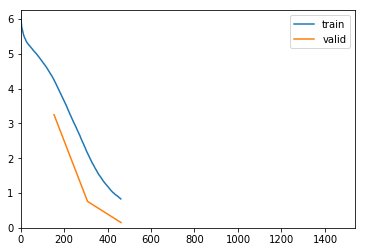

KeyboardInterrupt: 

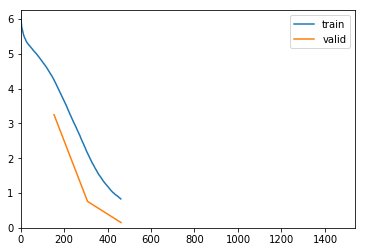

In [12]:
learn.fit_one_cycle(10,1e-2,moms=(.8,.7))

In [9]:
learn = language_model_learner(data_lm,AWD_LSTM,
                              path=path,
                              callback_fns=[partial(SaveModelCallback,every='epoch',name='jhlmwd'),
                                           ShowGraph])

In [10]:
learn.load((path/'models/jhlmwd_2'));

In [24]:
learn.load((path/'models/jhlmwd_1'));

In [27]:
learn.export('export_lm.pkl')

In [28]:
learn = load_learner(path, 'export_lm.pkl')

In [11]:
learn.predict('i think',50,temperature=.5)

"i think than this is not code of a means sure this is n't kind some input done - segmented explain decide freeze this 1 new input so this is 1 new convolution 're the tab satellite this is 1 new convolution 're the tab satellite this is 1 new convolution 're"

In [45]:
learn.predict('i think',50,temperature=.5)

"i think this will be a really good challenge to Jupiter notebook it 's an example of something other to be something i 'm going to do you can do this with a particular useful thing i 'm going to do if i 'm interested in doing some research and some"

# predict

In [22]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=.8) for i in range(len(TEXTS))))

1. xxbos " from folder so let 's just put that somewhere temporary and then we 're gon na go t dot label from CSD and you can look at the documentation to see exactly what that does and that 's gon na call label from date of data frame so

2. the time . That sounds like a pretty high number﹣the idea that you can actually guess the next word that often . So it 's a good sign that my language model is doing pretty well . For more limited domain documents ( like medical transcripts and legal

3. this is our standard data block API that you 've seen a few times from a data frame passing all of that information split it into valid vs. train label it with a dependent variable and here 's something i do n't think you 've seen before label this is

4. when you start with a new widget so if you 're using the old library please help me create a new data bunch with just the misclassified instances and go ahead and fit right and the misclassified ones " xxbos " this set of transforms and we 're go

In [26]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=.5) for i in range(len(TEXTS))))

1. xxbos " a really good exercise in making sure you understand the material so the first one we 're going to look at is a data set of satellite images and satellite imaging is a really fertile area for deep learning it 's certainly a lot of people already using deep

2. the same thing as plot top losses from last time where we saw this movie using the same kind of approach i described before but i \ 'd say like oh we 've got a little bit of experimenting to get the result of the lots of different ways you can

3. this is the init method in the tabular learner so this is the thing that actually image that 's going to take us into a topic called embeddings which is basically a key underlying platform behind these applications that will take us back into more computer vision using a pre trained

4. when you start with a new project we 're going to try and find a new project that we 're going to do we 're going to try and create models that the world 's most popular web frameworks people 

In [29]:
learn.predict('This is a simple test of', n_words=20)

"This is a simple test of creating something that 's sensible . This case you have a pretty good sense that it 's accurate ."

In [30]:
learn.predict('google',50,temperature=.8)

"google okay so this is my new data set this as well so i 've done that all right but that 's the basic idea is that you 've got a hundred and sixty - four pack together and there are layers that contain parameters and some parameters are subclasses change"

In [34]:
learn.predict('i really',50,temperature=.8)

"i really want to mention a much more useful treatment of jewish tradition in our house that has been revolutionary . Here 's a nice thing but Jason is just going to teach a theory - based theory there is something called a learner that will be a lot more"

In [38]:
learn.predict('i really',50,temperature=.5)

"i really want to tell you about them about what kind of data sets do i want to use right it is what that means okay that lets us give us a data set that 's going to be a state of the art in this particular point mutation one as well"

In [39]:
learn.predict('i really',50,temperature=.5)

"i really wanted to mention this this idea of dropout is a kind of a rule of thumb it says this is a nice thing to do with this is a nice way of dealing with simple stuff that would take a look at it and then it 'll get rid of"

In [40]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=.5) for i in range(len(TEXTS))))

1. xxbos " from folder so let 's just put that somewhere temporary and then we can fit it and then we fit fit some more and we 're ready to start the real lesson one so i 'm going to say let 's freeze let 's freeze all right so this

2. the world it 's a bit newer than tensorflow so you know a lot of people use this underlying process called the pet classifier this is the trick that you can use to decrease the number of channels to 24 . So if you 're doing classification , you can

3. this is the story that we 're going to cover in a moment so we 're going to try and create models that are actually going to be doing a big dive into convolutions later as well if you 're interested in thinking about this idea that this is a pretty

4. when you first go into platformer AI and click on the AI namespace , it 's just something which when you create a data bunch or whatever so forth it 's just a data bunch which can look at a lot of people see it in this case there

5. i really want to do a t

In [41]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=.4) for i in range(len(TEXTS))))

1. xxbos " way to validate the model if all we have is a training set then we have no way to know how we 're doing because we need a separate set of held out data a training set now we have a training set and a data bunch is something

2. the world it 's a bit newer than tensorflow so you know a lot of people who work full time on fast AI when you see people say okay i 'm not gon na bother telling you about some of the details this is the kind of thing you can

3. this is the standard documentation block API that you read about when we referred to this chart is coming from Chora last week we were correct it did come from Chora but actually we realized originally it came from Andrew earns excellent machine learning course on

4. when you first start xxbos " the top 10 % so the top five percent would be 0.93 one ish the top 10 % would be 0.93 0.93 ish ish more than that threshold i think that was a really cool sign " xxbos " the top 10 % so the

5. i really want to do a teddy bear detect

In [44]:
learn.predict('i think',50,temperature=.5)

"i think that 's a really good sign to start running deep learning and fast AI students but because it 's not a science academic data set is an interesting step it 's kind of the starting point in this journey it contains seven lessons each one 's about two hours"

In [45]:
learn.predict('i think',50,temperature=.5)

"i think this will be a really good challenge to Jupiter notebook it 's an example of something other to be something i 'm going to do you can do this with a particular useful thing i 'm going to do if i 'm interested in doing some research and some"

## best

In [47]:
learn.predict('i think',50,temperature=.6)

"i think this is a pretty interesting challenge to for deep learning that would take you a long way it really helps to build a deep learning model so i 'm going to say freeze_to which is what we do for the first half of my slice and then for the second"

In [48]:
learn.predict('i think',50,temperature=.6)

"i think oh it 's a good time period that the first thing i 've learned was what was going on here i 'm not really excited about i 'm mentioning for a while that i 'm just picking out my data bunch and then i 'm going to run this cell"

In [49]:
learn.predict('i think',50,temperature=.6)

"i think this is a pretty interesting challenge to Deep Residual Learning for coders which is that we 're going to be making sure that we do n't have to be in a certain order . In this case , we 've assumed that we 're doing computation"

In [50]:
learn.predict('i think',50,temperature=.6)

"i think this is really interesting this is like you can kind of say like oh i 'm going to try and find a goodly bunch of them but this is not a float it 's an n64 if this was a float then first day i would automatically know or guess"

In [51]:
learn.predict('i think',50,temperature=.6)

'i think this is a pretty good example " The first thing we need to do is to get to a point where we go okay and so we have to train the first few layers and then we fit a little bit more right now in this case i \'m'

In [54]:
learn.predict('i think',50,temperature=.65)

'i think this is really interesting in fact Simon is one of these very annoying people like Christine Payne who talked about last week who seems to be good at everything he does xxbos " this picture so an example of a computer vision approach where we actually do'

In [55]:
learn.predict('i think',50,temperature=.65)

"i think this will be a pretty good example of something like this one and this one called the encoder which will all you have to make sure it does n't have a separate validation set otherwise we 've just got a folder called train and a folder called valid and a"

# end